
# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.




####################################
####################################
('Dataset', 'moons')
('X_train', (60, 2))
('X_test', (40, 2))
('y_train', (60,))
('y_test', (40,))
------------------------------------
('    ', 'Classifier', 'KNN')
('        ', 'Accuracy Train/Test', 0.9333333333333333, 0.95)
('        ', 'Precision Train/Test', 0.9310344827586207, 0.9523809523809523)
('        ', 'Recall Train/Test', 0.9310344827586207, 0.9523809523809523)
('        ', 'F1 Train/Test', 0.9310344827586207, 0.9523809523809523)
('        ', 'ROC Train/Test', 0.9332591768631813, 0.949874686716792)
------------------------------------
('    ', 'Classifier', 'Linear SVM')
('        ', 'Accuracy Train/Test', 0.85, 0.875)
('        ', 'Precision Train/Test', 0.8846153846153846, 0.9)
('        ', 'Recall Train/Test', 0.7931034482758621, 0.8571428571428571)
('        ', 'F1 Train/Test', 0.8363636363636363, 0.8780487804878048)
('        ', 'ROC Train/Test', 0.8481646273637374, 0.8759398496240601)
------

/home/hugo/anaconda2/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/hugo/anaconda2/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------------------------
('    ', 'Classifier', 'RBF SVM')
('        ', 'Accuracy Train/Test', 0.9666666666666667, 0.875)
('        ', 'Precision Train/Test', 0.9615384615384616, 1.0)
('        ', 'Recall Train/Test', 0.9615384615384616, 0.7916666666666666)
('        ', 'F1 Train/Test', 0.9615384615384616, 0.8837209302325582)
('        ', 'ROC Train/Test', 0.9660633484162896, 0.8958333333333333)
------------------------------------
('    ', 'Classifier', 'Decision Tree')
('        ', 'Accuracy Train/Test', 0.9833333333333333, 0.775)
('        ', 'Precision Train/Test', 1.0, 0.8571428571428571)
('        ', 'Recall Train/Test', 0.9615384615384616, 0.75)
('        ', 'F1 Train/Test', 0.9803921568627451, 0.7999999999999999)
('        ', 'ROC Train/Test', 0.9807692307692308, 0.78125)
------------------------------------
('    ', 'Classifier', 'Random Forest')
('        ', 'Accuracy Train/Test', 1.0, 0.8)
('        ', 'Precision Train/Test', 1.0, 0.9)
('        ', 'Recall Train/

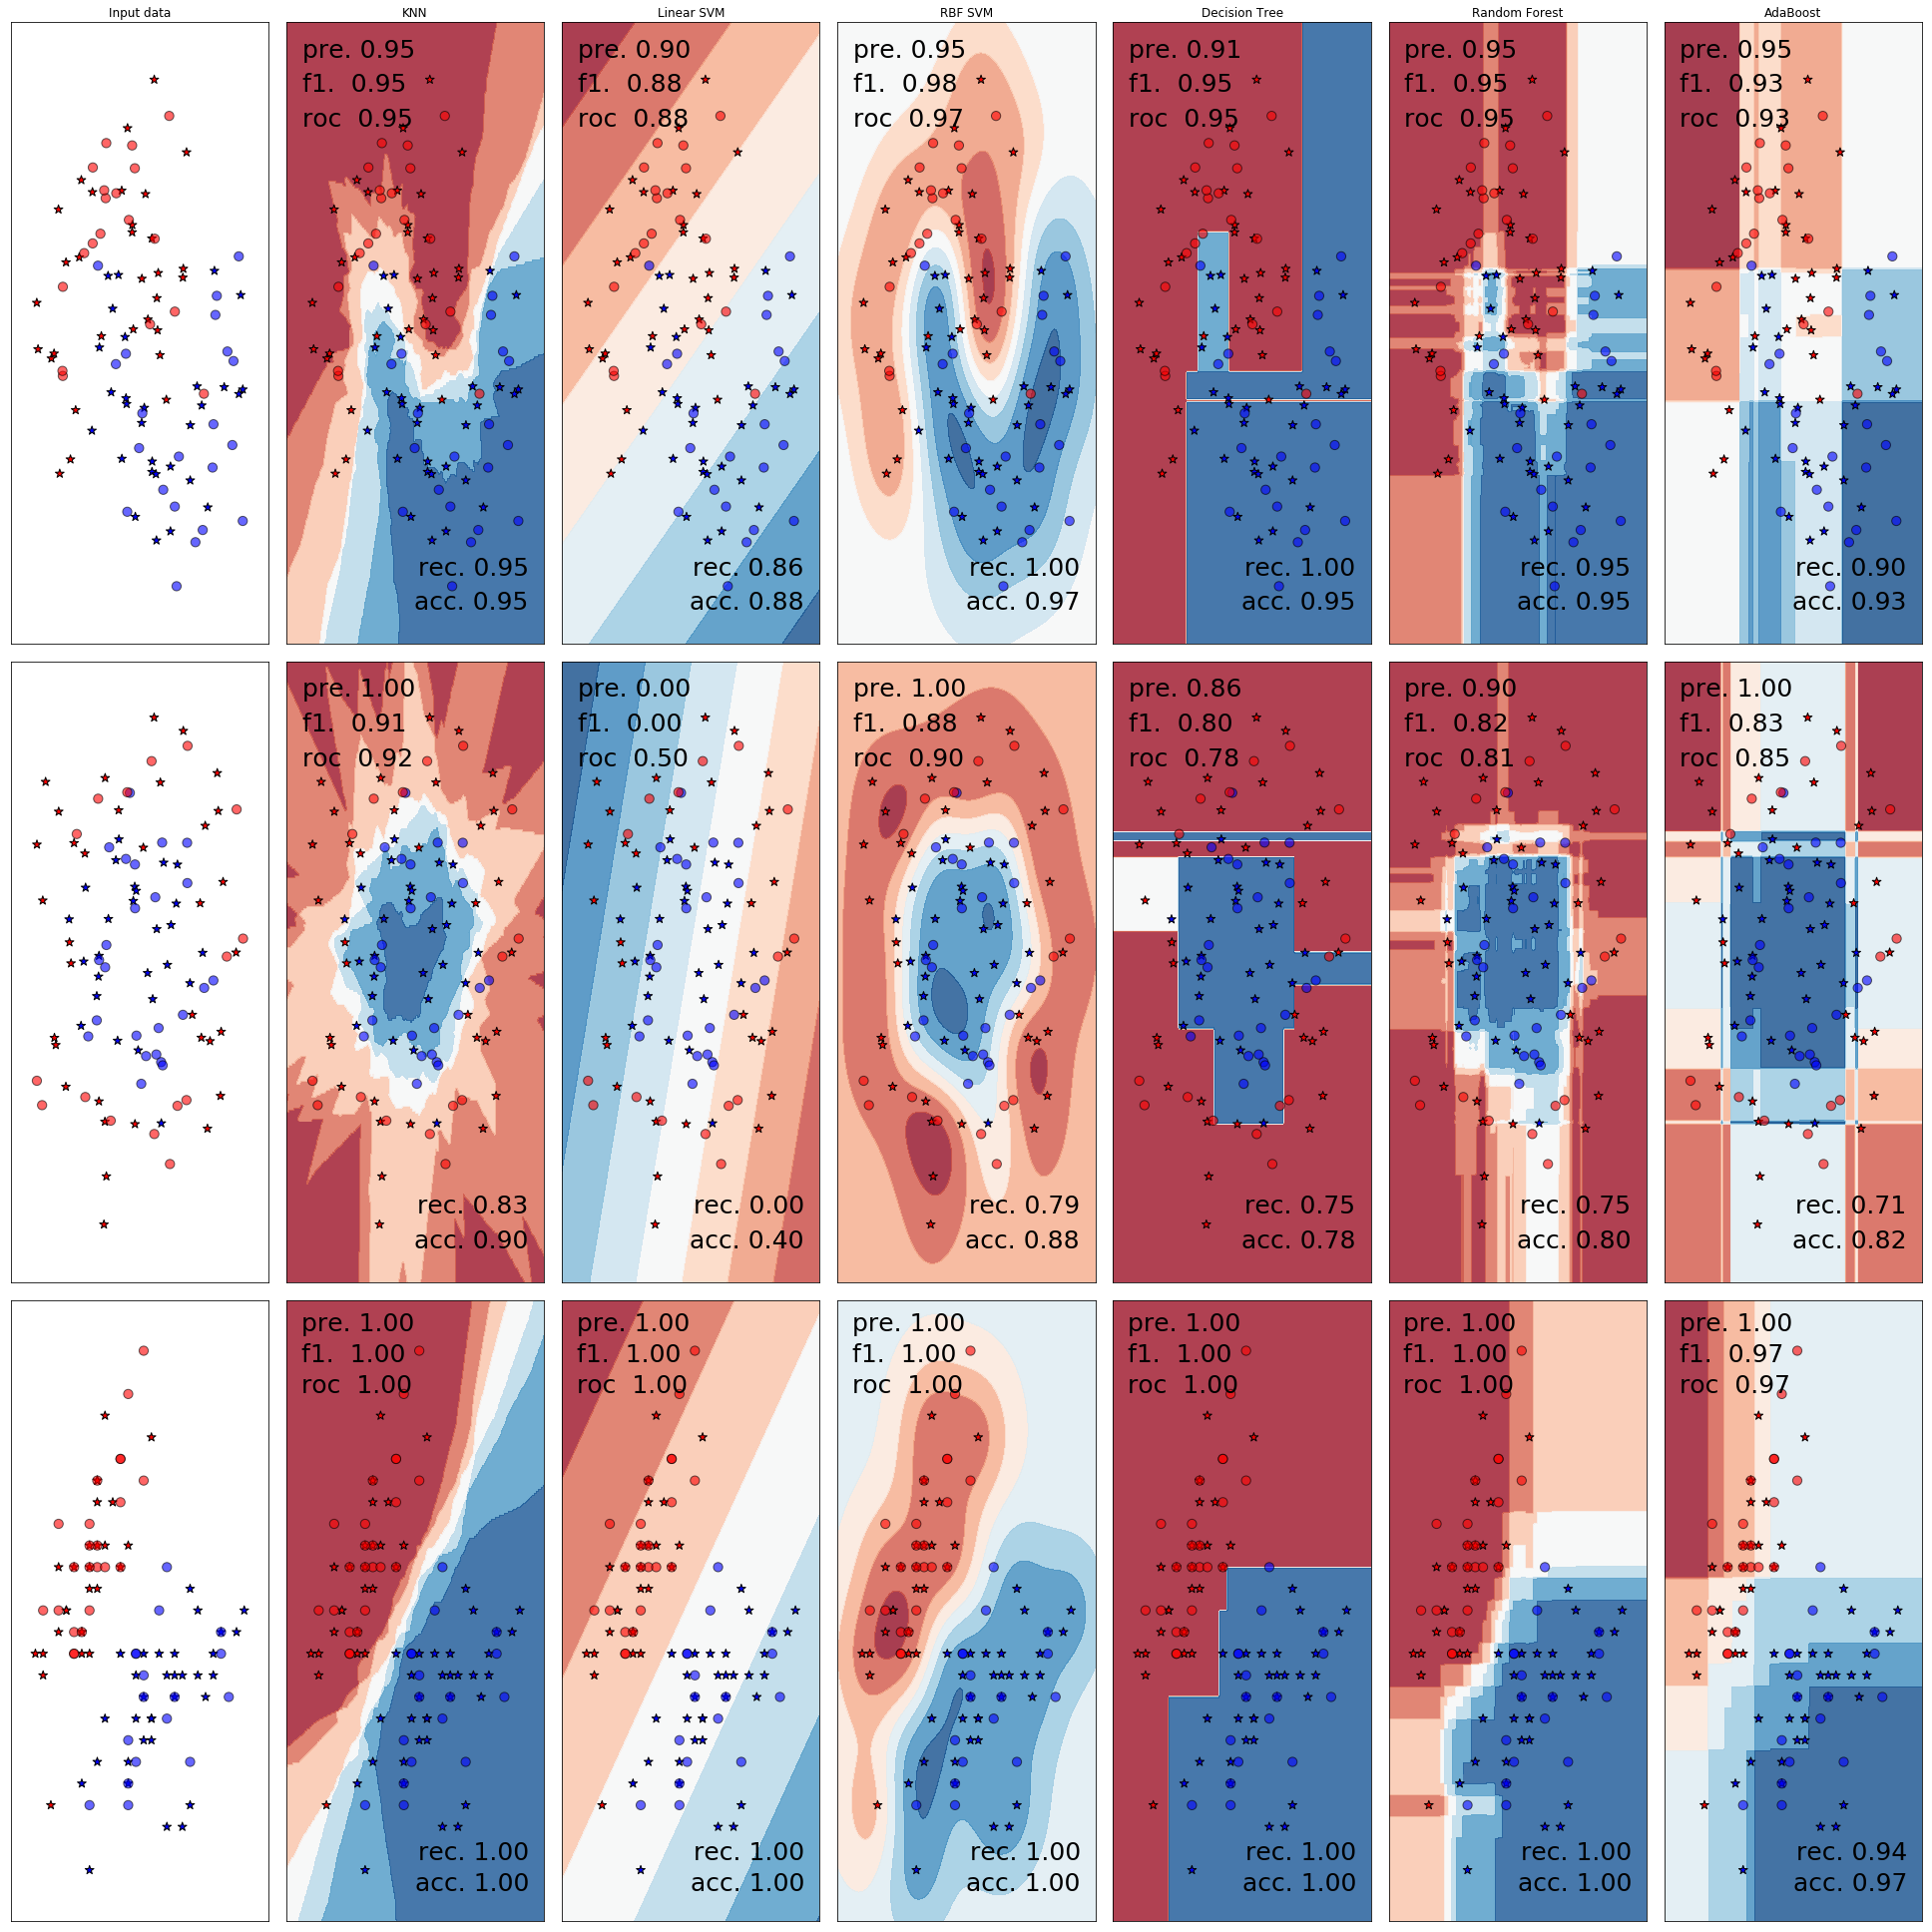

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics

%matplotlib inline

#############################################################################################################
# Adapted from: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html #
#############################################################################################################

h = .02  # Step size in the mesh for plotting.

# Classifier names.
names = ["KNN", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost"]

# Presetting classifiers.
classifiers = [
    KNeighborsClassifier(9),
    SVC(kernel="linear", C=0.1),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=7, n_estimators=100),
    AdaBoostClassifier()
]

# Presetting datasets.
iris_indices = np.where(load_iris()['target'] < 2)[0]
dataset_names = ['moons', 'circles', 'iris']
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            (load_iris()['data'][iris_indices, 0:2], load_iris()['target'][iris_indices])
            ]

# Presetting matplotlib figure.
figure = plt.figure(figsize=(27, 27))
marker_size = 85
text_size = 25
i = 1

# Iterate over datasets.
for ds_cnt, ds in enumerate(datasets):
    
    ds_name = dataset_names[ds_cnt]
    
    # Split into training and test part.
    X, y = ds # X -> features, y -> labels.
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # Splitting.

    # Printing dataset shapes.
    print('')
    print('####################################')
    print('####################################')
    print('Dataset', ds_name)
    print('X_train', X_train.shape)
    print('X_test', X_test.shape)
    print('y_train', y_train.shape)
    print('y_test', y_test.shape)
    
    # Finding boundaries.
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Just plot the dataset first.
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # Plot the training points;
    ax.scatter(X_train[:, 0], X_train[:, 1], marker_size, c=y_train, cmap=cm_bright, edgecolors='k', marker='*')
    # and testing points.
    ax.scatter(X_test[:, 0], X_test[:, 1], marker_size, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k', marker='o')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Iterate over classifiers.
    for name, clf in zip(names, classifiers):
        
        
        print('------------------------------------')
        print('    ', 'Classifier', name)
        
        # Adding subplot.
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # Fitting classifier to train data.
        clf.fit(X_train, y_train)
        
        # Obtaining class prediction for training data.
        y_pred_train = clf.predict(X_train)
        
        # Obtaining class prediction for unseen data.
        y_pred_test = clf.predict(X_test)
        
        # Computing error metrics in the training data.
        acc_train = metrics.accuracy_score(y_train, y_pred_train)
        pre_train = metrics.precision_score(y_train, y_pred_train)
        rec_train = metrics.recall_score(y_train, y_pred_train)
        f1_train  = metrics.f1_score(y_train, y_pred_train)
        roc_train = metrics.roc_auc_score(y_train, y_pred_train)
        
        # Computing error metrics in the unseen data.
        acc_test = metrics.accuracy_score(y_test, y_pred_test)
        pre_test = metrics.precision_score(y_test, y_pred_test)
        rec_test = metrics.recall_score(y_test, y_pred_test)
        f1_test  = metrics.f1_score(y_test, y_pred_test)
        roc_test = metrics.roc_auc_score(y_test, y_pred_test)
        
        # Printing error metrics.
        print('        ', 'Accuracy Train/Test', acc_train, acc_test)
        print('        ', 'Precision Train/Test', pre_train, pre_test)
        print('        ', 'Recall Train/Test', rec_train, rec_test)
        print('        ', 'F1 Train/Test', f1_train, f1_test)
        print('        ', 'ROC Train/Test', roc_train, roc_test)

        # Plot the decision boundary.
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot.
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points;
        ax.scatter(X_train[:, 0], X_train[:, 1], marker_size, c=y_train, cmap=cm_bright, edgecolors='k', marker='*')
        # and testing points.
        ax.scatter(X_test[:, 0], X_test[:, 1], marker_size, c=y_test, cmap=cm_bright, edgecolors='k', marker='o', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        
        # Printing error metrics.
        ax.text(xx.max() - .3, yy.min() + .3,  ('acc. %.2f' % acc_test).lstrip('0'), size=text_size, horizontalalignment='right')
        ax.text(xx.max() - .3, yy.min() + .6,  ('rec. %.2f' % rec_test).lstrip('0'), size=text_size, horizontalalignment='right')
        ax.text(xx.min() + .3, yy.max() - .3,  ('pre. %.2f' % pre_test).lstrip('0'), size=text_size, horizontalalignment='left')
        ax.text(xx.min() + .3, yy.max() - .6, ('f1.  %.2f' % f1_test).lstrip('0'), size=text_size, horizontalalignment='left')
        ax.text(xx.min() + .3, yy.max() - .9, ('roc  %.2f' % roc_test).lstrip('0'), size=text_size, horizontalalignment='left')
        i += 1

plt.tight_layout()
plt.show()